<a href="https://colab.research.google.com/github/cgodec/Homework_Godec/blob/master/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Homework 9**

**Part 1**

In [1]:
# Load data
from google.colab import drive
drive.mount('/content/drive')

filedir = '/content/drive/MyDrive/fwe458/data/'
fname = filedir + "SW_with_AOD.csv"

import pandas as pd
BSRN = pd.read_csv(fname)
BSRN.head()

Mounted at /content/drive


SZA       AOD       COD  CLD_FRAC        UW         TO3    Pressure  \
0  24.936783  1.172892  2.440000  0.286546  2.021502  311.419861  959.085083   
1  34.865055  1.626954  4.630000  0.468832  4.859887  308.713379  968.427551   
2  27.330978  1.095007  2.030000  0.301414  5.278558  293.322052  988.040588   
3  20.361732  1.126541  5.500000  0.377019  4.856422  321.498199  977.610229   
4  13.433228  0.725452  0.736076  0.075378  0.644262  295.448975  882.321411   

     BSA    WSA   SW_direct  SW_diffuse  
0  0.162  0.193  467.191650  300.820007  
1  0.155  0.169  264.900024  385.293335  
2  0.136  0.149  313.553314  321.538361  
3  0.156  0.179  143.902298  501.073639  
4  0.188  0.212  957.331665   79.003334

In [2]:
# Check for missing values
BSRN.isnull().sum()

SZA           0
AOD           0
COD           0
CLD_FRAC      0
UW            0
TO3           0
Pressure      0
BSA           0
WSA           0
SW_direct     0
SW_diffuse    0
dtype: int64

No missing values

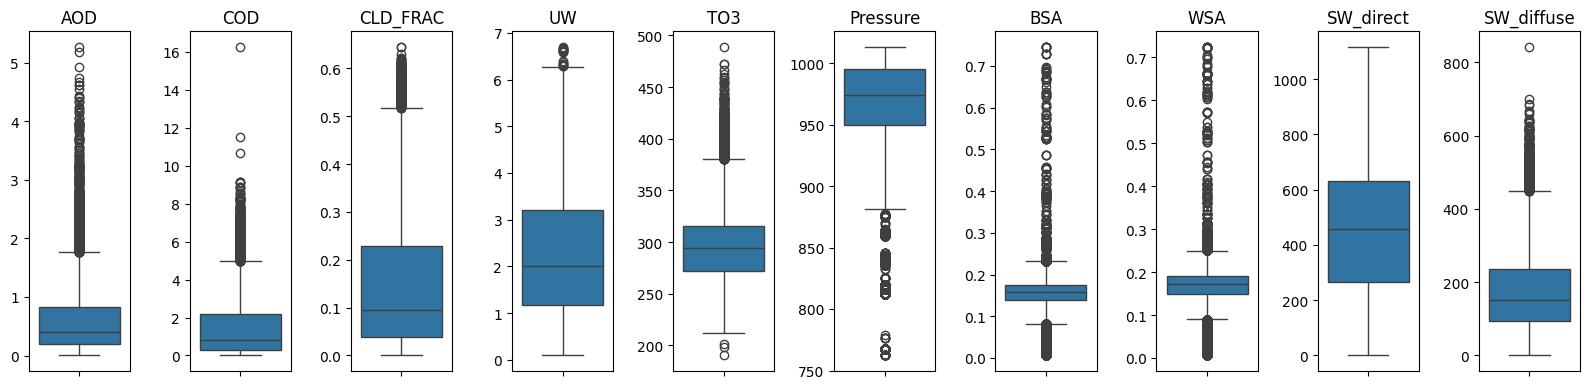

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

features_with_outliers = ['AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure', 'BSA', 'WSA', 'SW_direct', 'SW_diffuse']

# Create a row of boxplots
fig, axes = plt.subplots(1, len(features_with_outliers), figsize=(16, 4))

# Plot each boxplot
for i, col in enumerate(features_with_outliers):
    sns.boxplot(y=BSRN[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In the context of atmospheric and solar radiation data, many of the observed outliers represent naturally occurring but rare environmental conditions — not errors. Therefore, feature outliers will be kept.

In [10]:
BSRN.describe()

SZA           AOD           COD      CLD_FRAC            UW  \
count  35224.000000  35224.000000  35224.000000  35224.000000  35224.000000   
mean      43.955300      0.607132      1.386743      0.146884      2.272496   
std       15.444956      0.561003      1.427229      0.136276      1.315785   
min        0.325058      0.001963      0.000031      0.000000      0.093588   
25%       32.476989      0.204275      0.290974      0.037539      1.172140   
50%       45.385958      0.399925      0.809864      0.095963      2.011255   
75%       56.807423      0.830358      2.163631      0.229764      3.218210   
max       69.999329      5.267975     16.270000      0.645196      6.701678   

                TO3      Pressure           BSA           WSA     SW_direct  \
count  35224.000000  35224.000000  35224.000000  35224.000000  35224.000000   
mean     296.895774    958.845881      0.160722      0.173584    450.597469   
std       33.357280     52.633037      0.048753      0.050240    245.017590   
min      190.352508    762.234070      0.006000      0.006000      0.001667   
25%      272.429588    949.587585      0.138000      0.150000    264.165695   
50%      294.010345    974.347961      0.158000      0.173000    455.886505   
75%      315.578445    995.123108      0.176000      0.190000    632.048050   
max      488.984100   1013.250000      0.746000      0.724000   1116.736084   

         SW_diffuse  
count  35224.000000  
mean     178.151183  
std      103.433791  
min        0.000000  
25%       95.249779  
50%      151.666077  
75%      236.968338  
max      842.514526

In [11]:
# Create new column
BSRN["SW_total"] = BSRN['SW_direct'] + BSRN['SW_diffuse']

# Create new categorical column
BSRN['SW_total_category'] = pd.qcut(BSRN['SW_total'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
BSRN.head()

SZA       AOD       COD  CLD_FRAC        UW         TO3    Pressure  \
0  24.936783  1.172892  2.440000  0.286546  2.021502  311.419861  959.085083   
1  34.865055  1.626954  4.630000  0.468832  4.859887  308.713379  968.427551   
2  27.330978  1.095007  2.030000  0.301414  5.278558  293.322052  988.040588   
3  20.361732  1.126541  5.500000  0.377019  4.856422  321.498199  977.610229   
4  13.433228  0.725452  0.736076  0.075378  0.644262  295.448975  882.321411   

     BSA    WSA   SW_direct  SW_diffuse     SW_total SW_total_category  
0  0.162  0.193  467.191650  300.820007   768.011658                Q3  
1  0.155  0.169  264.900024  385.293335   650.193359                Q3  
2  0.136  0.149  313.553314  321.538361   635.091675                Q2  
3  0.156  0.179  143.902298  501.073639   644.975937                Q3  
4  0.188  0.212  957.331665   79.003334  1036.334999                Q4

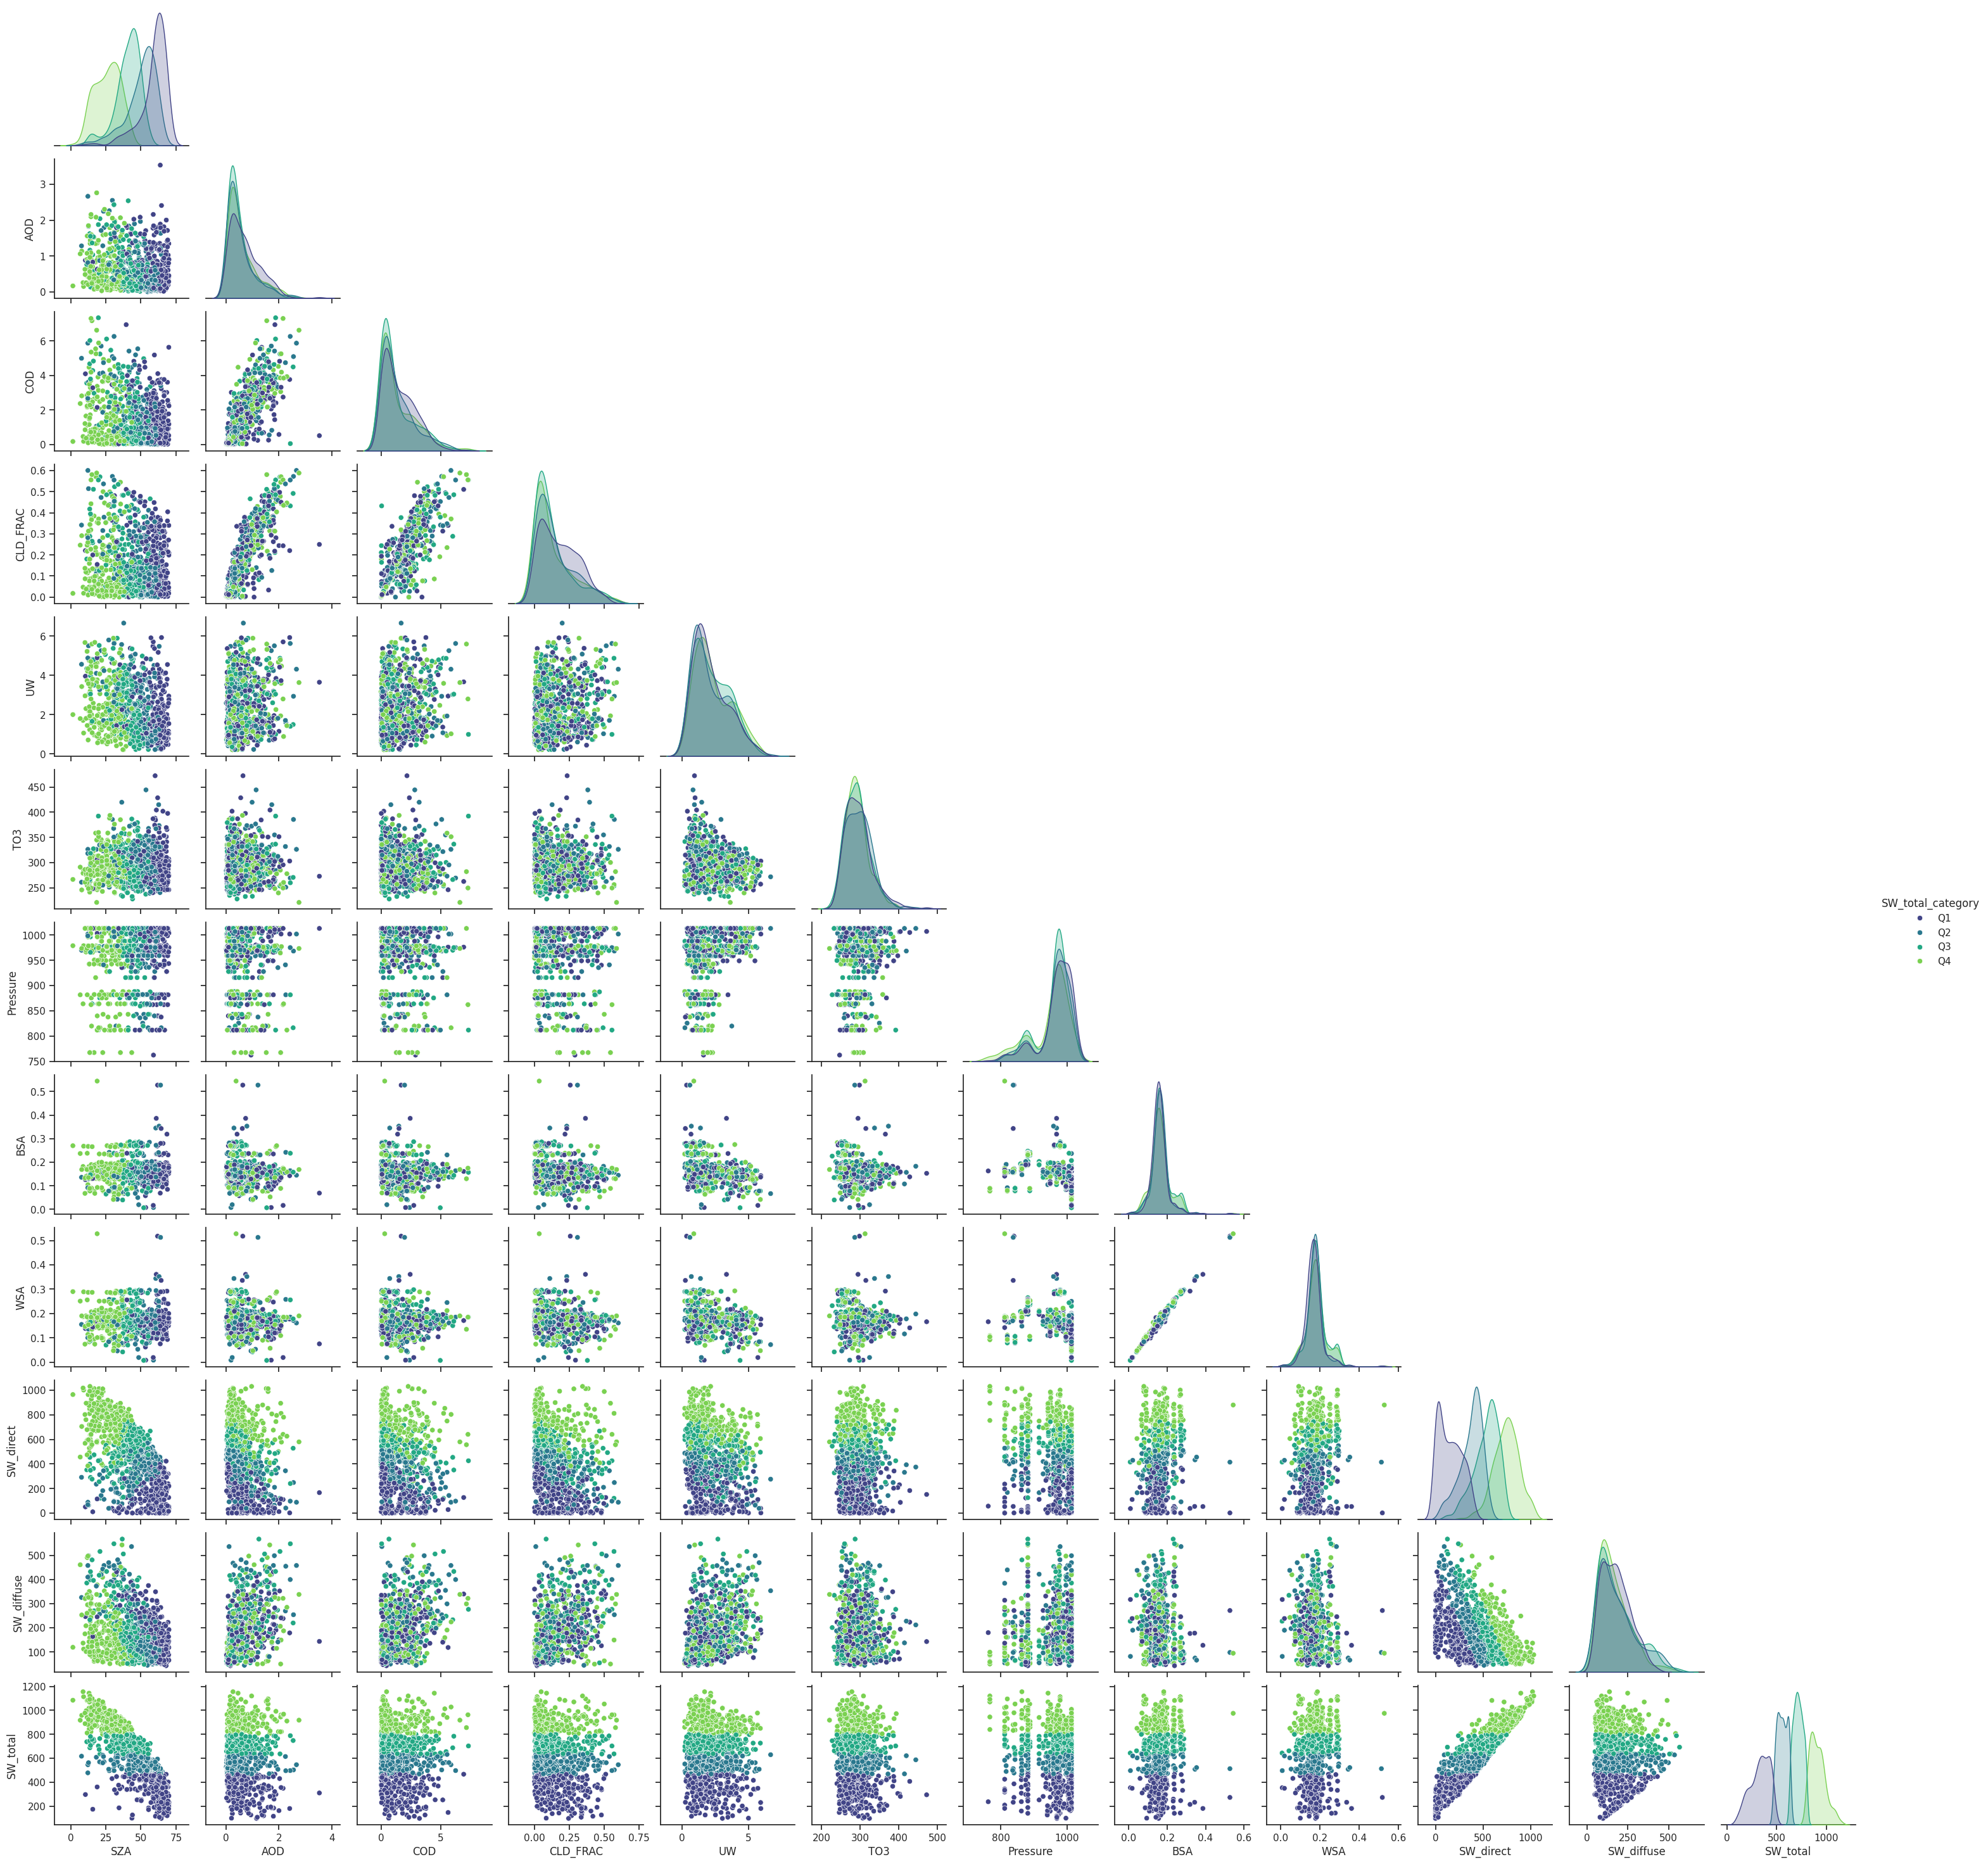

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BSRN_sampled = BSRN.sample(n=1000, random_state=42)

# Create pairplot
plot_columns = [
    'SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure',
    'BSA', 'WSA', 'SW_direct', 'SW_diffuse', 'SW_total', 'SW_total_category'
]
sns.set(style="ticks")
sns.pairplot(BSRN_sampled[plot_columns], hue='SW_total_category', palette='viridis', corner=True)
plt.show()

**Part 2.1**

In [13]:
from sklearn.preprocessing import StandardScaler

# Select only input features (exclude SW_direct, SW_diffuse, SW_total, SW_total_category)
features = ['SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure', 'BSA', 'WSA']
X = BSRN[features]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

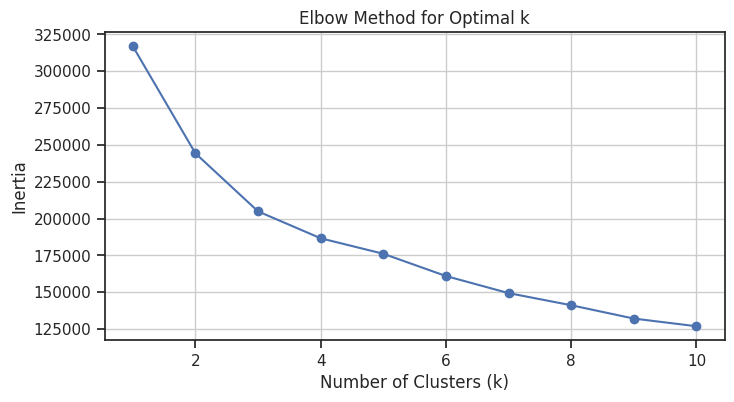

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [15]:
# Run KMeans with optimal k of 4
kmeans = KMeans(n_clusters=4, random_state=42)
BSRN['Cluster'] = kmeans.fit_predict(X_scaled)

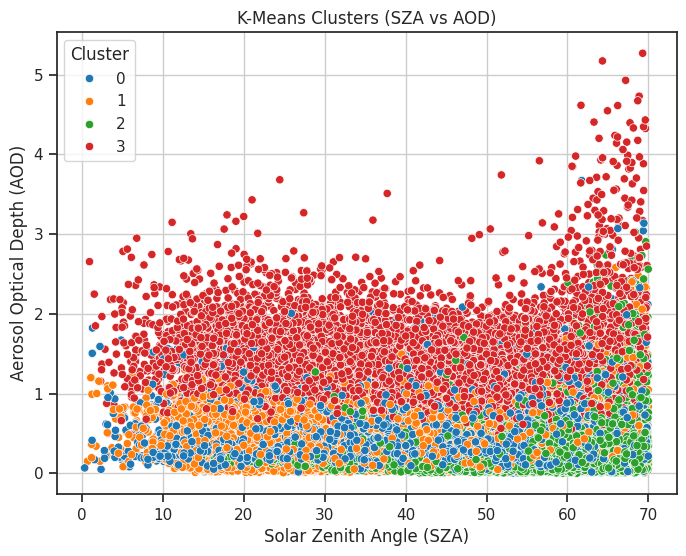

In [16]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=BSRN, x='SZA', y='AOD', hue='Cluster', palette='tab10')
plt.title("K-Means Clusters (SZA vs AOD)")
plt.xlabel("Solar Zenith Angle (SZA)")
plt.ylabel("Aerosol Optical Depth (AOD)")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


In [17]:
# Crosstab to see relationship
cluster_vs_radiation = pd.crosstab(BSRN['Cluster'], BSRN['SW_total_category'])
print(cluster_vs_radiation)

SW_total_category    Q1    Q2    Q3    Q4
Cluster                                  
0                  1187  1500  1887  2486
1                  1440  1779  2599  3384
2                  3892  3638  2529  1382
3                  2287  1889  1791  1554


In [18]:
# Average SW_total per cluster
print("\nAverage SW_total per cluster:\n")
print(BSRN.groupby('Cluster')['SW_total'].mean().round(2))


Average SW_total per cluster:

Cluster
0    696.97
1    693.96
2    555.38
3    596.53
Name: SW_total, dtype: float64


The clusters are meaningful in terms of solar radiation categories. Clusters 0 and 1 generally display lower AOD and SZA values, which corresponds to high solar radiation. Cluster 2 is characterized by high SZA, but generally low AOD, corresponding to lower solar radiation levels. Cluster 3 is correlated with high AOD levels, indicating lower solar radiation levels. These patterns reflect how atmospheric conditions influence the amount of solar energy reaching the surface

**Part 3.1**

In [19]:
# Import statements
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Define input and target
features = ['SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure', 'BSA', 'WSA']
X = BSRN[features]
y = BSRN['SW_total']

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Decision Tree Regressor:
RMSE: 139.09
R² Score: 0.607


<ipython-input-21-06551d992ddd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_tree_df, palette='viridis')


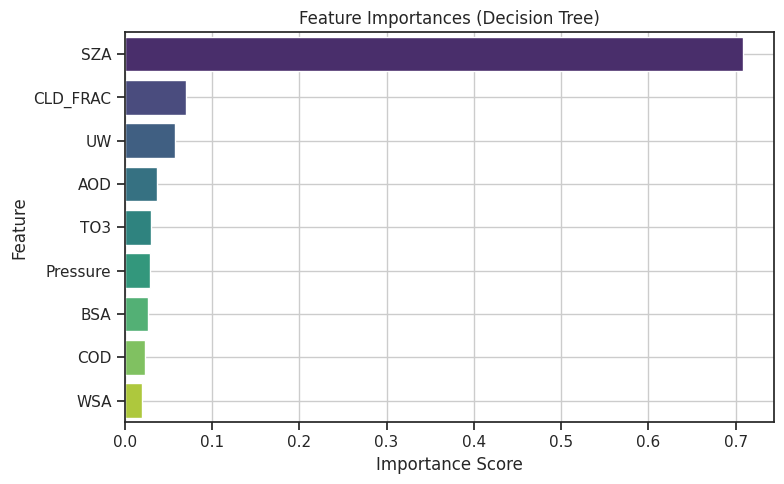

In [21]:
# Model the decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# Plot the decision tree feature importances
importances_tree = tree_model.feature_importances_
feature_importance_tree_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_tree
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_tree_df, palette='viridis')
plt.title('Feature Importances (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest Regressor:
RMSE: 99.04
R² Score: 0.801


<ipython-input-22-8031420fb158>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df, palette='viridis')


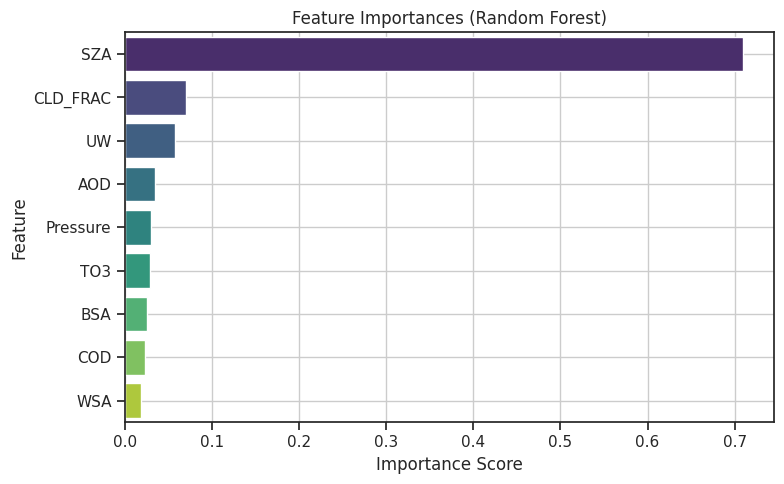

In [22]:
# Model the random forest regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_forest))
r2_rf = r2_score(y_test, y_pred_forest)

print("Random Forest Regressor:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.3f}")

# Plot the random forest feature importances
importances_rf = forest_model.feature_importances_
feature_importance_rf_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df, palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

The random forest model indicates that SZA is the most important feature by a significant margin. Other featurs such as CLD_FRAC and UW also play a role in the model but are not nearly as important. It is intuitive that SZA is the most influential feature because the solar angle directly influences how much sunlight reaches the Earth's surface, making it a major determinant of surface solar radiation. CLD_FRAC and UW, though not as influential as SZA, play a role in prediciting surface solar radiation. Both affect how solar radiation is absorbed, which would have an impact on its level.

**Part 3.2**



In [23]:
# Import statements
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Features and target
features = ['SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure', 'BSA', 'WSA']
X = BSRN[features]
y = BSRN['SW_total_category']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

K-Nearest Neighbors Classifier
Accuracy: 0.6823
Precision: 0.6829
Recall: 0.6818


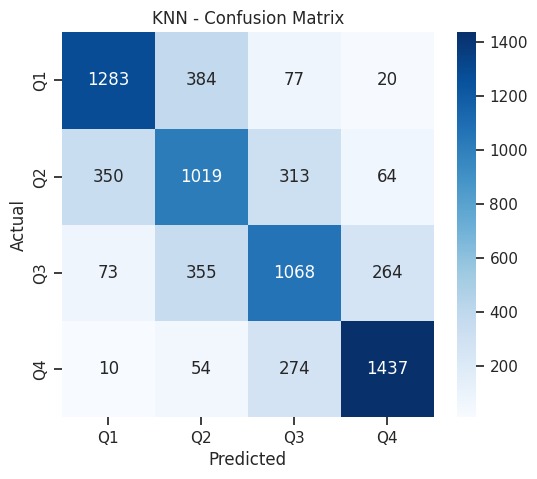

In [25]:
# K-Nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

labels = ["Q1", "Q2", "Q3", "Q4"]

# KNN evaluation
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='macro')
rec_knn = recall_score(y_test, y_pred_knn, average='macro')
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=labels)

print("K-Nearest Neighbors Classifier")
print(f"Accuracy: {acc_knn:.4f}")
print(f"Precision: {prec_knn:.4f}")
print(f"Recall: {rec_knn:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Gaussian Naive Bayes Classifier
Accuracy: 0.6573
Precision: 0.6620
Recall: 0.6570


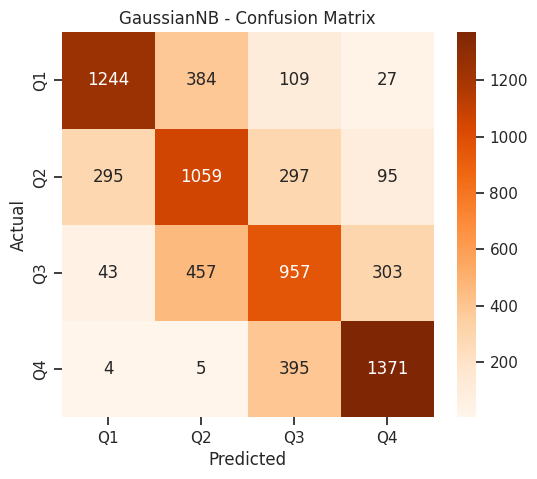

In [26]:
# GaussianNB classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

labels = ["Q1", "Q2", "Q3", "Q4"]

# GaussianNB evaluation
acc_gnb = accuracy_score(y_test, y_pred_gnb)
prec_gnb = precision_score(y_test, y_pred_gnb, average='macro')
rec_gnb = recall_score(y_test, y_pred_gnb, average='macro')
cm_gnb = confusion_matrix(y_test, y_pred_gnb, labels=labels)

print("\nGaussian Naive Bayes Classifier")
print(f"Accuracy: {acc_gnb:.4f}")
print(f"Precision: {prec_gnb:.4f}")
print(f"Recall: {rec_gnb:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.title("GaussianNB - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The KNN model performs slightly better. It has a higher accuracy, precision and recall score. KNN performs better because it does not assume any specific distribution of the data, whereas, GaussianNB assumes independence and normally distributed features. Some features in the dataset are unlikely to be normally distributed like AOD and SZA and some features may be correlated, resulting in the KNN model to perform better.



**Part 4**

Based on the results, SZA is the most important feature for determining total shortwave radiation. This logically makes sense because the solar angle directly influences how much sunlight reaches the Earth's surface. Other features like CLD_FRAC and UW, though not as influential as SZA, also play a role in prediciting surface solar radiation as both affect how solar radiation is absorbed.

Clustering and classification methods revealed clear patterns within the data that are meaningful in terms of solar radiation categories. When visualized by AOD and SZA, clusters indicated that lower values correspond with higher solar radiation. High AOD levels indicated lower solar radiation levels. Among the classification methods, the KNN model outperformed the GaussianNB model.

Based on the results, I would recommend utilizing a random forest regression model to predict solar radiation. This model was able to provide a strong interpretation of the importance of all the features. The model performed well with a RMSE of 99.04 and an R² Score of 0.801, reasonable metrics for working with environmental data. Based on the methods of this analysis, a random forest regression model seems to be best.